<a href="https://colab.research.google.com/github/joew2k/finance_data/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yfin

yfin.pdr_override()

## 2. Money at a floating rate for a secured purchase (e.g. home or automobile) for an individual.


In [3]:
# https://docs.google.com/spreadsheets/d/10jC5jFYiXATbMJ2pQQ9EZ90ltsWArY_1/edit?usp=sharing&ouid=104201836496546578557&rtpof=true&sd=true

file_id = "10jC5jFYiXATbMJ2pQQ9EZ90ltsWArY_1"

# Create a URL to the Excel file
url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx"
df = pd.read_excel(url)

df = df.rename(columns={'observation_date': 'Date', 'MORTGAGE30US':"Rates" })
df = df.set_index('Date')
rateChanges = df.pct_change()

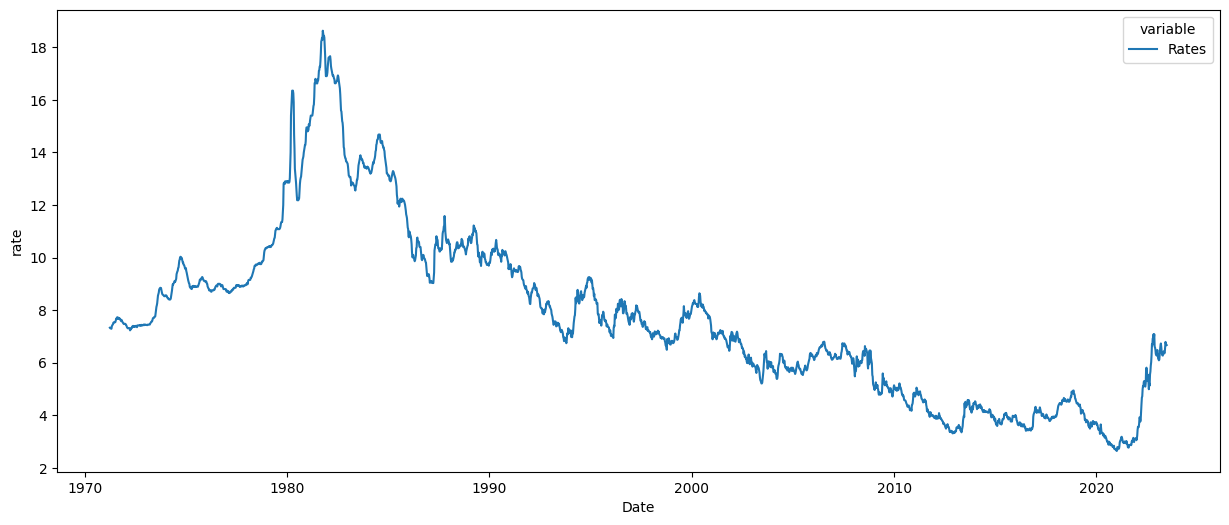

In [4]:
df['Date'] = df.index
fig, ax = plt.subplots()

# Setting the figure size (width, height) in inches
fig.set_size_inches(15, 6)

# Plotting data
sns.lineplot(x = 'Date', y='value',  hue='variable', data = df.melt(id_vars=["Date"]))

# Customize other aspects of the plot
plt.ylabel('rate')

# Show the plot
plt.show()

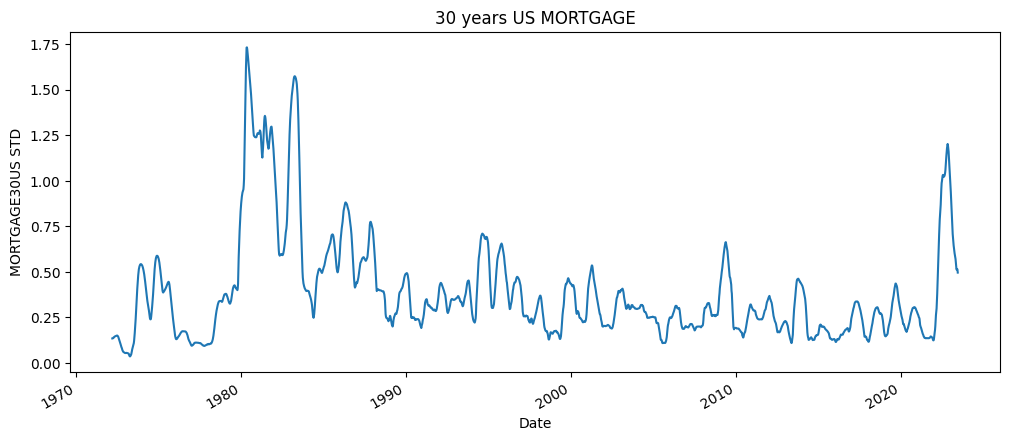

In [5]:
vols = df['Rates'].rolling(50).std()
# set figure size
plt.figure(figsize=(12, 5))

# plot using rolling average
vols.plot()

plt.ylabel('MORTGAGE30US STD')
plt.title('30 years US MORTGAGE')
plt.show()

2000s: Mortgage rates dropped from 8.15% in January 2000 to the 5% range in mid-2003. The Great Recession in 2008 led to lower rates, with rates reaching 5.14% at the end of 2009 (Sean Bryant).

2010s: Rates began the decade around 5.09% and fell to around 3.35% by the end of 2012. However, rates started to rise again after the 2016 presidential election, fluctuating between 2018 and 2019. The decade ended with rates at 3.74% (Sean Bryant).

2020s: The 2020s started with rates at 3.72%. Due to the COVID-19 pandemic, the Federal Reserve cut interest rates, leading to a new historical low of 2.67% by the end of 2020. Throughout 2021, rates remained between 2.70% and 3.10%. In 2022, rates surged to their highest levels since 2002, with the average 30-year rate reaching 7.08% by October. In the first half of 2023, rates fluctuated between the low 6% range and high 6% range, with hopes of descending over the course of the year (Sean Bryant, Peter Miller and Denny Ceizyk).

### 5. Publicly traded bond (e.g. treasury bond, corporate bond) – that is, securities lending of a bond.
for this we review data for the iShares 20+ Year Treasury Bond ETF. The data was retrieved yahoo finance

In [6]:
startDate = datetime.date.today() - datetime.timedelta(365 * 20)
endDate = datetime.date.today()

# Pulling the prices from yahoo finace
prices = web.DataReader(['TLT'], startDate, endDate)["Adj Close"]

# Convert prices series to data frame
prices = pd.DataFrame(prices)
## Rename column
prices = prices.rename(columns = {"Adj Close": "iShares 20+ Year Treasury Bond ETF"})

##d Drop null values
prices = prices.dropna()

# ## returns of each instrument base on price change
returns = prices.pct_change()

[*********************100%***********************]  1 of 1 completed


### Exploratory Data Analysis

Review the descriptive statistics of the bond


In [7]:
prices.describe()

,iShares 20+ Year Treasury Bond ETF
count,5030.000000
mean,89.390311
std,30.185677
min,42.612930
25%,61.568095
50%,91.488697
75%,109.477888
max,161.689407


**Count**: The number of data points available is 5030.<br>
**Mean**: The average value of the bond ETF is approximately 89.557.<br>
**Standard Deviation (Std)**: The measure of the dispersion of values around the mean is approximately 30.30. It indicates the variability of the data points.<br>
**Minimum (Min)**: The lowest value observed in the dataset is 42.72. It represents the lowest recorded price for the bond ETF.<br>
**25th Percentile (25%)**: 25% of the data points fall below the value of approximately 61.55. It signifies the lower quartile or the first quartile.<br>
**50th Percentile (50% or Median)**: 50% of the data points fall below the value of approximately 91.60. It represents the middle value of the dataset when arranged in ascending order.<br>
**75th Percentile (75%)**: 75% of the data points fall below the value of approximately 109.77 It represents the upper quartile or the third quartile.<br>
**Maximum (Max)**: The highest value observed in the dataset is 162.13. It represents the highest recorded price for the bond ETF.

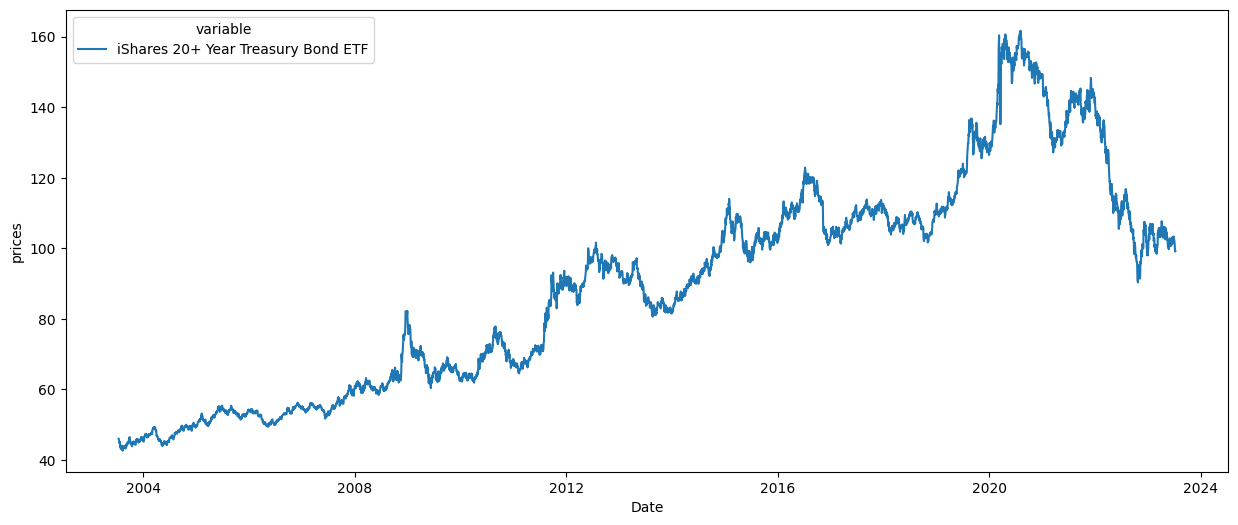

In [8]:
prices['Date'] = prices.index
fig, ax = plt.subplots()

# Setting the figure size (width, height) in inches
fig.set_size_inches(15, 6)

# Plotting data
sns.lineplot(x = 'Date', y='value',  hue='variable', data = prices.melt(id_vars=["Date"]))

# Customize other aspects of the plot
plt.ylabel('prices')

# Show the plot
plt.show()

### Price Analysis.

Prices of the bond appears to be on a upward trends making higher highs and higher lows. However the recent prices shows that prices have broken a major support level and this could be an indication of change in trend and the team may want to do further analysis on that.

In [9]:
returns.describe()

,iShares 20+ Year Treasury Bond ETF
count,5029.000000
mean,0.000194
std,0.009106
min,-0.066683
25%,-0.005066
50%,0.000449
75%,0.005443
max,0.075195


###  Volatility of Bonds

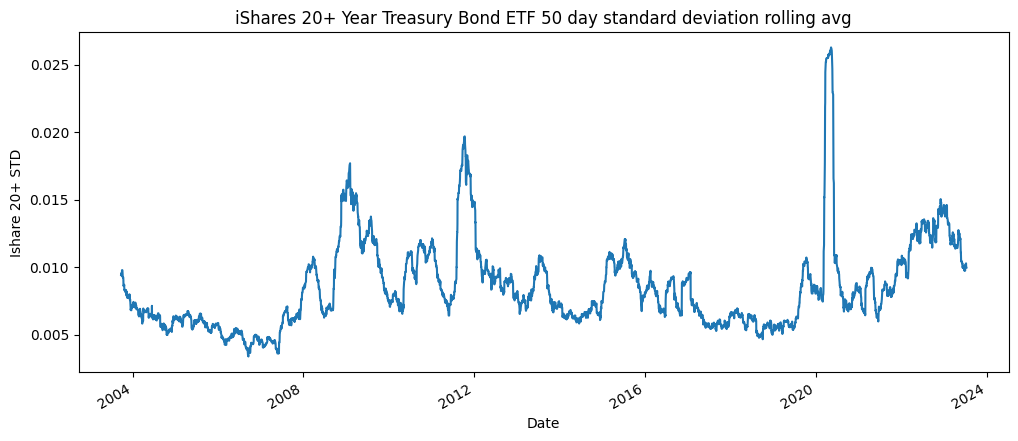

In [10]:
vols = returns['iShares 20+ Year Treasury Bond ETF'].rolling(50).std()
# set figure size
plt.figure(figsize=(12, 5))

# plot using rolling average
vols.plot()

plt.ylabel('Ishare 20+ STD')
plt.title('iShares 20+ Year Treasury Bond ETF 50 day standard deviation rolling avg')
plt.show()

Obviously from the above it is clear that the volatility of the returns of bods are not constant, We can see how volatility Peak at the period 2008/2009, 2012, and 2020. These are periods of financial crisis.

We observed a sharp rise and fall in prices of the treasury bond in early 2020, this is a clear indication of the effect of the pandemic in the globalmarket about 19 Trillion Dollars was injected into the market as investors panic. This was also followed by sharp drop after the covid pandemic starts to phased away.

The box plot also show the presence of this outliers during the period

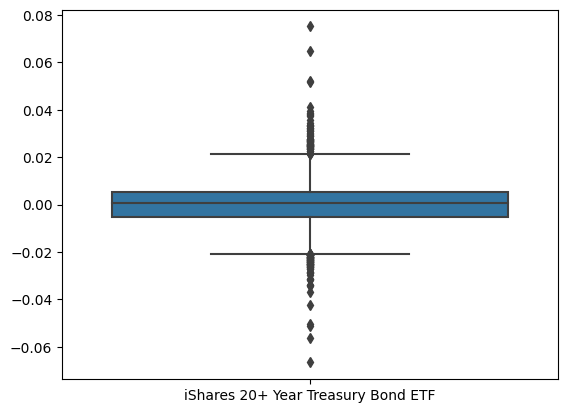

In [11]:
sns.boxplot(data=returns);

## 6. An illiquid security – you choose the security.(Crypto)

[*********************100%***********************]  1 of 1 completed


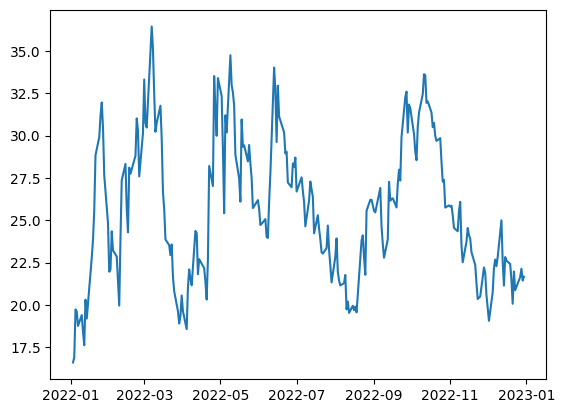

In [12]:

import matplotlib.pyplot as plt
Vix_data=yfin.download ("^VIX", start="2022-01-01",end="2023-01-01")
plt.plot(Vix_data["Adj Close"].dropna())

[*********************100%***********************]  1 of 1 completed


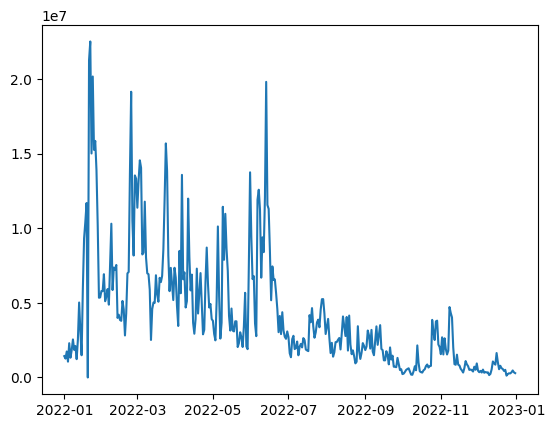

In [13]:
Crypto_data=yfin.download ("ADADOWN-USD", start="2022-01-01",end="2023-01-01")
plt.plot(Crypto_data["Volume"].dropna())

###The first table is the time series data of the two Volatility index cards Adjusted closing price and when compared to the with the second diagram which is the time series data of ADADOWN Crypto trading volume. From the diagram, one can not expressly says the price of VIX really have appreciable impact on the trading volume of ADADOWN Crypto####



**Reference**

Historical Mortgage Rates: Past, Present, and Future · TIME Stamped- https://time.com/personal-finance/article/historical-mortgage-rates/


UMortgage Rates Chart | Historical and Current Rate Trends- https://themortgagereports.com/61853/30-year-mortgage-rates-chart

Historical Mortgage Rates: Averages and Trends from the 1970s to 2022 https://www.valuepenguin.com/mortgages/historical-mortgage-rates

<br><br>
**Data source**

- iShares 20+ Year Treasury Bond ETF Yahoo Finance
- MORTGAGE30US https://fred.stlouisfed.org/series/MORTGAGE30US


# PROJECT 2

In [14]:
def downloadPrices(tickers):

  startDate = datetime.date.today() - datetime.timedelta(365 * 20)
  endDate = datetime.date.today()

  # Pulling the prices from yahoo finace
  prices = web.DataReader(list(tickers.keys()), startDate, endDate)["Adj Close"]

  # Convert prices series to data frame
  prices = pd.DataFrame(prices)
  ## Rename column
  prices = prices.rename(columns = tickers)

  ##d Drop null values
  prices = prices.dropna()

  # ## returns of each instrument base on price change
  return prices.pct_change()

## Downloading Data

In [15]:
returns = downloadPrices({"SNOW": "Snowflake Inc", "TLT": "iShares 20+ Year Treasury Bond ETF"})

[*********************100%***********************]  2 of 2 completed


In [16]:
returns.describe()

,Snowflake Inc,iShares 20+ Year Treasury Bond ETF
count,706.000000,706.000000
mean,0.000354,-0.000569
std,0.043158,0.010659
min,-0.165011,-0.034183
25%,-0.023641,-0.007830
50%,0.000845,-0.001031
75%,0.022943,0.006128
max,0.230673,0.038474


The data shows the daily returns of Snowflake Inc which is a growth stock and iShares 20+ Year Treasury Bond ETF for 706 trading days.

The mean return of Snowflake Inc is 0.000354, which is slightly higher than the mean return of iShares 20+ Year Treasury Bond ETF, which is -0.000569.

The standard deviation of Snowflake Inc is 0.043158, which indicates that it has higher volatility than iShares 20+ Year Treasury Bond ETF, which has a standard deviation of 0.010659.

The minimum and maximum returns of Snowflake Inc are -0.165011 and 0.230673, respectively, while the minimum and maximum returns of iShares 20+ Year Treasury Bond ETF are -0.034183 and 0.038474, respectively.

The median return of Snowflake Inc is 0.000845, which is close to its mean, while the median return of iShares 20+ Year Treasury Bond ETF is -0.001031, which is slightly lower than its mean.

The interquartile range of Snowflake Inc is 0.046584, which is larger than the interquartile range of iShares 20+ Year Treasury Bond ETF, which is 0.013958.

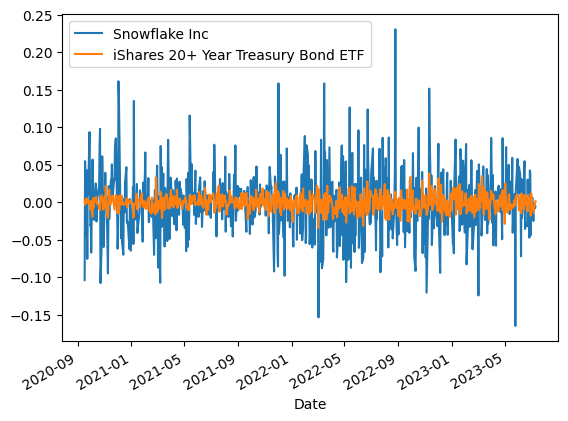

In [18]:
returns.plot();

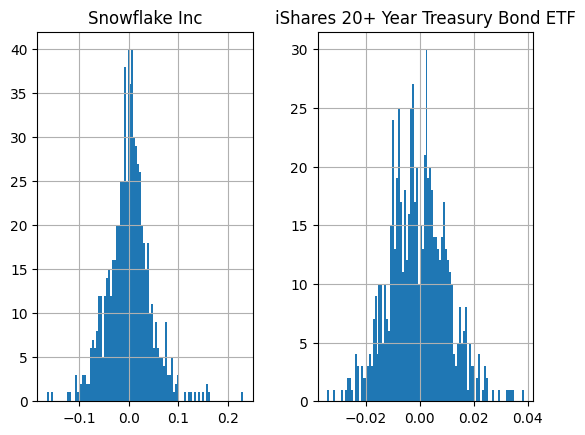

In [19]:
returns.hist(bins=100);

<Axes: >

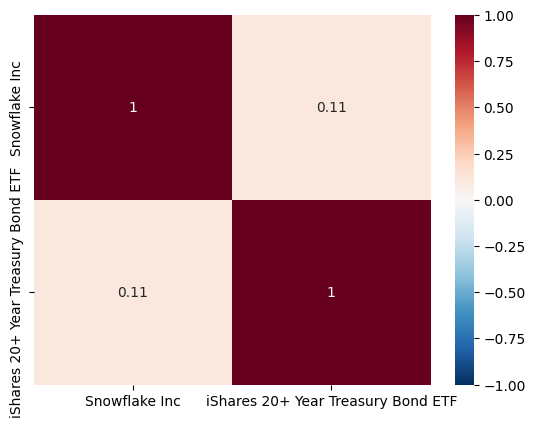

In [21]:
sns.heatmap(returns.corr(),
            cmap='RdBu_r', annot=True,
    vmin=-1, vmax=1)

The heat map indicates that there exit a very low positive correlation between this two assets.

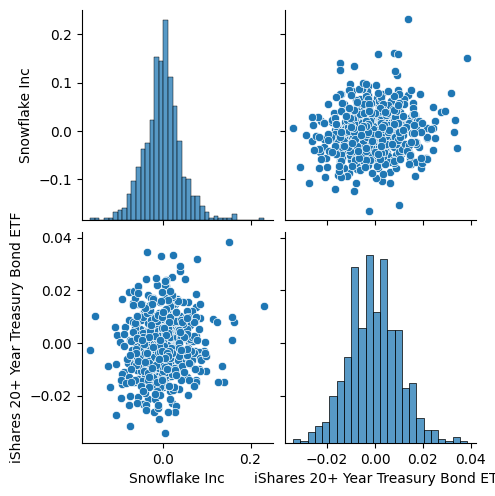

In [22]:
sns.pairplot(returns)

<Axes: xlabel='Date'>

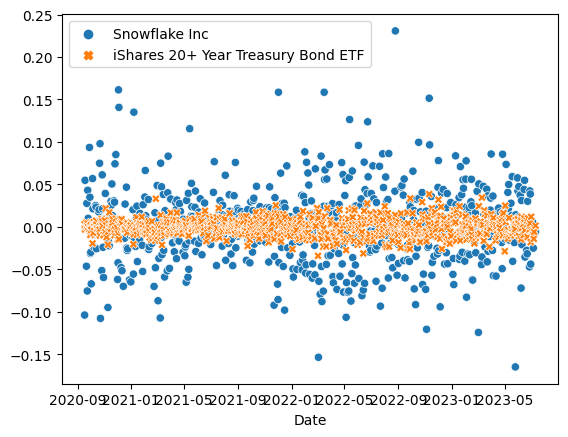

In [23]:
sns.scatterplot(returns)

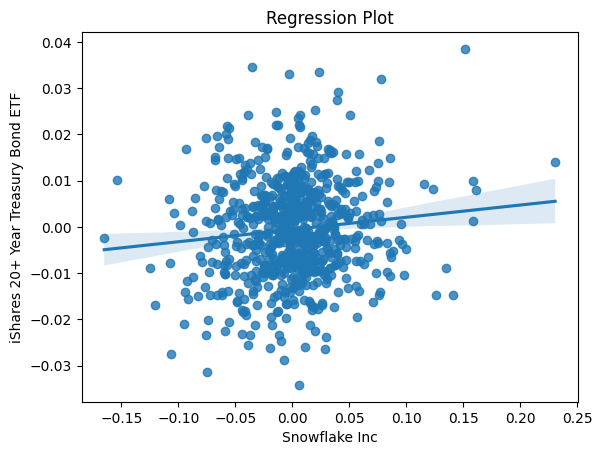

In [17]:
sns.regplot(x='Snowflake Inc',y = 'iShares 20+ Year Treasury Bond ETF', data =returns)
plt.title('Regression Plot');

From all the charts above it is very indicative that the growth stock as more volatilty comapared the the 10 Years US Treasury Bond which appears to have a stable volatilty. Investing in the growth asset may have higher yield but we need to be aware that it is volatile comapred to the Bond.